In [ ]:
# prompt: import gym atari

!pip install gym[atari]
import gym


In [ ]:

import numpy as np
from sklearn.metrics import classification_report
# สร้างสภาพแวดล้อม Gym
env = gym.make('CartPole-v1')

# กำหนด hyperparameters
num_episodes = 1000
train_ratio = 0.8  # 80% สำหรับ train, 20% สำหรับ test
train_episodes = int(num_episodes * train_ratio)
test_episodes = num_episodes - train_episodes

# สร้าง agent (ในตัวอย่างนี้ใช้ agent แบบสุ่ม)
def random_policy(observation):
    return env.action_space.sample()

# ฟังก์ชันสำหรับฝึก agent
def train_agent(env, policy, num_episodes):
    total_rewards = []
    for episode in range(num_episodes):
        observation = env.reset()
        episode_rewards = 0
        done = False
        while not done:
            action = policy(observation)
            # แก้ไข: ใช้ *info เพื่อรับข้อมูลเพิ่มเติมที่อาจส่งคืนมา
            observation, reward, done, *info = env.step(action)
            episode_rewards += reward
            if done:
                break
        total_rewards.append(episode_rewards)
    return total_rewards

# ฟังก์ชันสำหรับทดสอบ agent
def test_agent(env, policy, num_episodes):
    return train_agent(env, policy, num_episodes)  # ใช้ฟังก์ชัน train_agent ในการทดสอบ

# แสดงตัวอย่าง input 5 ตัวอย่าง
print("ตัวอย่าง input (observation) 5 ตัวอย่าง:")
for _ in range(5):
    observation = env.reset()
    print(observation)

# ฝึก agent
train_rewards = train_agent(env, random_policy, train_episodes)

# ทดสอบ agent
test_rewards = test_agent(env, random_policy, test_episodes)

# แสดงผลลัพธ์
# แสดงผลลัพธ์ในรูปแบบอย่างง่าย
print("ตัวอย่าง Output (Reward) 5 ตัวอย่าง:")
print("Train rewards (first 5):", train_rewards[:5])  # แสดงผลรางวัล 10 episode แรก
print("Test rewards (first 5):", test_rewards[:5])  # แสดงผลรางวัล 10 episode แรก

# คำนวณรางวัลเฉลี่ย
avg_train_reward = np.mean(train_rewards)
avg_test_reward = np.mean(test_rewards)

print(f"Average train reward: {avg_train_reward:.2f}")
print(f"Average test reward: {avg_test_reward:.2f}")


env.close()



ตัวอย่าง input (observation) 5 ตัวอย่าง:
(array([ 0.00166269,  0.03906635, -0.02937223, -0.00665889], dtype=float32), {})
(array([-0.00918498,  0.02506651, -0.03269383, -0.04140791], dtype=float32), {})
(array([-0.03962079,  0.03657113,  0.02359306, -0.03302563], dtype=float32), {})
(array([-0.01023405, -0.04573439, -0.02680803, -0.00205106], dtype=float32), {})
(array([ 0.00144599, -0.01250964,  0.02362505, -0.02146572], dtype=float32), {})


/usr/local/lib/python3.11/dist-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


ตัวอย่าง Output (Reward) 5 ตัวอย่าง:
Train rewards (first 5): [9.0, 22.0, 11.0, 28.0, 18.0]
Test rewards (first 5): [13.0, 15.0, 18.0, 19.0, 21.0]
Average train reward: 22.83
Average test reward: 22.70


In [ ]:
#dataset info

import pandas as pd

# สร้าง DataFrame จากข้อมูล train_rewards
train_df = pd.DataFrame({'Episode': range(1, len(train_rewards) + 1), 'Reward': train_rewards})

# สร้าง DataFrame จากข้อมูล test_rewards
test_df = pd.DataFrame({'Episode': range(1, len(test_rewards) + 1), 'Reward': test_rewards})

# แสดงข้อมูลเบื้องต้นของ DataFrame (train)
print("Train Data Info:")
print(train_df.info())
print("\nTrain Data Describe:")
print(train_df.describe())


# แสดงข้อมูลเบื้องต้นของ DataFrame (test)
print("\nTest Data Info:")
print(test_df.info())
print("\nTest Data Describe:")
print(test_df.describe())



Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Episode  800 non-null    int64  
 1   Reward   800 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 12.6 KB
None

Train Data Describe:
        Episode      Reward
count  800.0000  800.000000
mean   400.5000   22.828750
std    231.0844   12.995885
min      1.0000    8.000000
25%    200.7500   14.000000
50%    400.5000   19.000000
75%    600.2500   28.000000
max    800.0000  115.000000

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Episode  200 non-null    int64  
 1   Reward   200 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.3 KB
None

Test Data Describe:
          Episode      Reward
count  200.000000 

/usr/local/lib/python3.11/dist-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


ข้อมูลเบื้องต้นของ train rewards:
count    800.000000
mean      22.677500
std       11.803077
min        8.000000
25%       15.000000
50%       19.000000
75%       28.000000
max      100.000000
dtype: float64

ข้อมูลเบื้องต้นของ test rewards:
count    200.000000
mean      22.290000
std       11.127669
min        9.000000
25%       14.750000
50%       19.000000
75%       26.250000
max       71.000000
dtype: float64


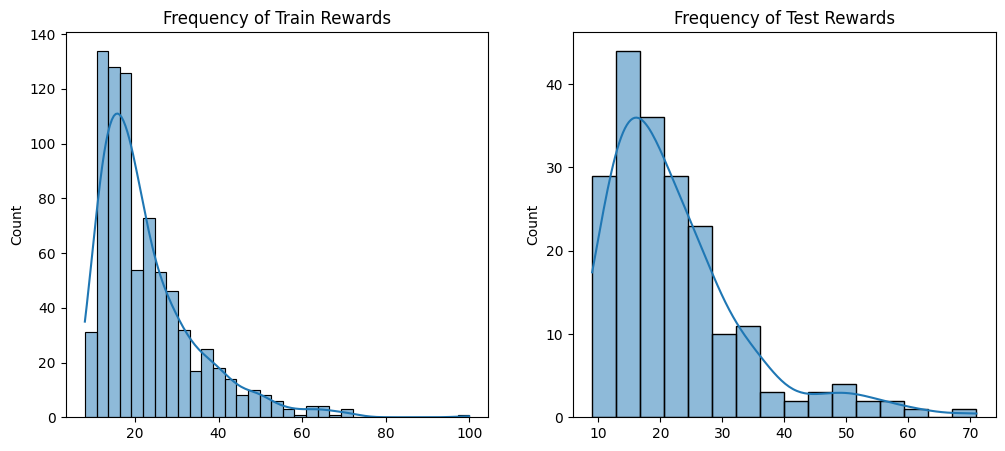

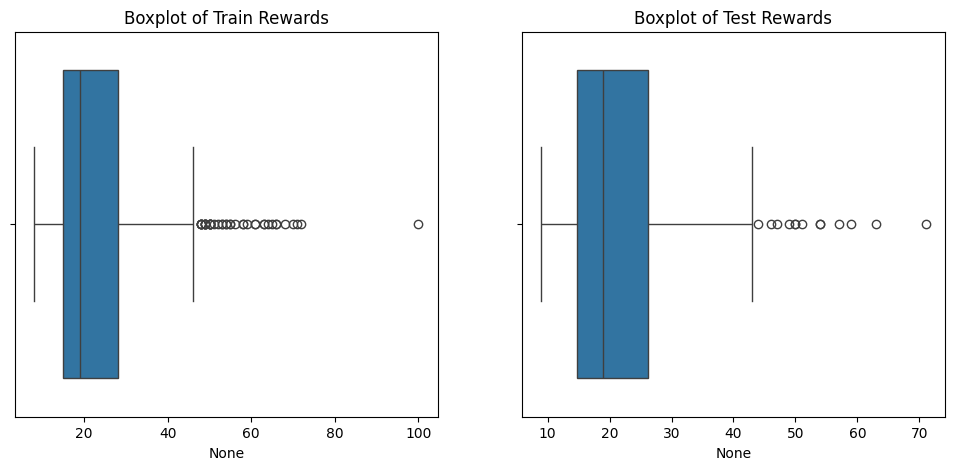

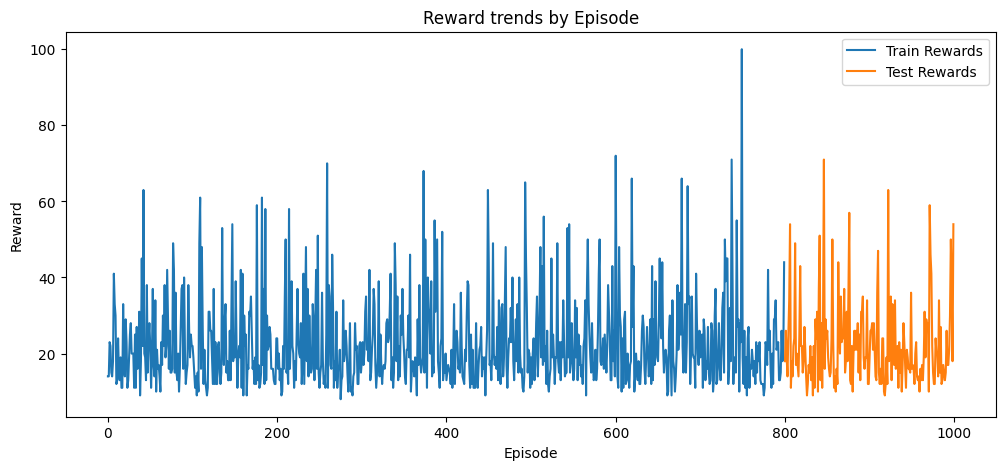

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# สร้างสภาพแวดล้อม Gym
env = gym.make('CartPole-v1')

# กำหนด hyperparameters
num_episodes = 1000
train_ratio = 0.8  # 80% สำหรับ train, 20% สำหรับ test
train_episodes = int(num_episodes * train_ratio)
test_episodes = num_episodes - train_episodes

# สร้าง agent (ในตัวอย่างนี้ใช้ agent แบบสุ่ม)
def random_policy(observation):
    return env.action_space.sample()

# ฟังก์ชันสำหรับฝึก agent
def train_agent(env, policy, num_episodes):
    total_rewards = []
    for episode in range(num_episodes):
        observation = env.reset()
        episode_rewards = 0
        done = False
        while not done:
            action = policy(observation)
            # แก้ไข: ใช้ *info เพื่อรับข้อมูลเพิ่มเติมที่อาจส่งคืนมา
            observation, reward, done, *info = env.step(action)
            episode_rewards += reward
            if done:
                break
        total_rewards.append(episode_rewards)
    return total_rewards

# ฟังก์ชันสำหรับทดสอบ agent
def test_agent(env, policy, num_episodes):
    return train_agent(env, policy, num_episodes)  # ใช้ฟังก์ชัน train_agent ในการทดสอบ

# ฝึก agent
train_rewards = train_agent(env, random_policy, train_episodes)

# ทดสอบ agent
test_rewards = test_agent(env, random_policy, test_episodes)

# แปลง rewards เป็น pandas Series เพื่อความสะดวกในการวิเคราะห์
train_rewards_series = pd.Series(train_rewards)
test_rewards_series = pd.Series(test_rewards)

# EDA เบื้องต้น

# 1. ข้อมูลเบื้องต้น
print("ข้อมูลเบื้องต้นของ train rewards:")
print(train_rewards_series.describe())
print("\nข้อมูลเบื้องต้นของ test rewards:")
print(test_rewards_series.describe())

# 2. การกระจายของข้อมูล (Histogram)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(train_rewards_series, kde=True)
plt.title("Frequency of Train Rewards")
plt.subplot(1, 2, 2)
sns.histplot(test_rewards_series, kde=True)
plt.title("Frequency of Test Rewards")
plt.show()

# 3. Boxplot เพื่อดูค่าผิดปกติ (Outliers)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=train_rewards_series)
plt.title("Boxplot of Train Rewards")
plt.subplot(1, 2, 2)
sns.boxplot(x=test_rewards_series)
plt.title("Boxplot of Test Rewards")
plt.show()

# 4. Line plot เพื่อดูแนวโน้มรางวัลตาม episode
plt.figure(figsize=(12, 5))
plt.plot(train_rewards_series, label="Train Rewards")
plt.plot(range(train_episodes, num_episodes), test_rewards_series, label="Test Rewards")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Reward trends by Episode")
plt.legend()
plt.show()

env.close()